In [19]:
library(ggplot2)
library(reshape2)
library(RColorBrewer)


In [4]:
# Initial Operations
# Electronic Diary Data

# Read csv file, separated by "\tab"
# Subjects Day of Visit
headers_DOV <- read.csv(file="DOV.txt", sep="\t", header = F, nrows = 1, as.is = T)
df_DOV <- read.csv(file="DOV.txt", sep="\t", skip = 1, header = F)
colnames(df_DOV)<- headers_DOV
df_DOV$VisitDate <- as.Date(paste0(df_DOV$VISDAT),format="%d-%b-%y")

# Order Visit factor properly for plotting

my.factor = function(x) { factor(x, levels = unique(x)) }

fn = factor(df_DOV$Visit, levels=unique(df_DOV$Visit[order(df_DOV$Visit)]), ordered=TRUE)
df_DOV$Visit<- my.factor(fn)

df_DOV$Site<-levels(df_DOV$Site)[df_DOV$Site]

# Day of Visit subjects data characteristics
# Explicit some lines
row.has.na <- apply(df_DOV, 1, function(x){any(is.na(x))})
# Number of row missing data
paste0('Initial number of rows with NA: ', sum(row.has.na))
df_DOV.filtered <- df_DOV[!row.has.na,]

#head(df_DOV,50)
#head(df_DOV.filtered)
#str(df_DOV.filtered)
#summary(df_DOV.filtered)

[1] "Initial number of rows with NA: 2"

## DOV.txt file description


### Data summary

In this data, there were two entries with DATA missing. 
A total of 15 attended the pre-screenig and screening session in six sites, but attendace dropped througout the follow-up process

### Visualization of data distribuition


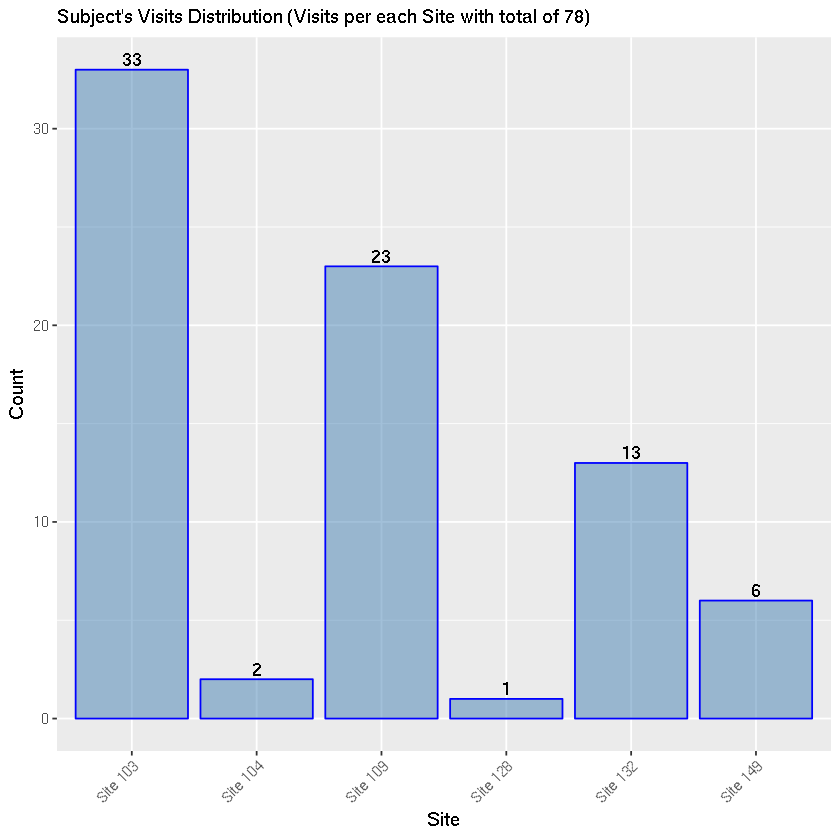

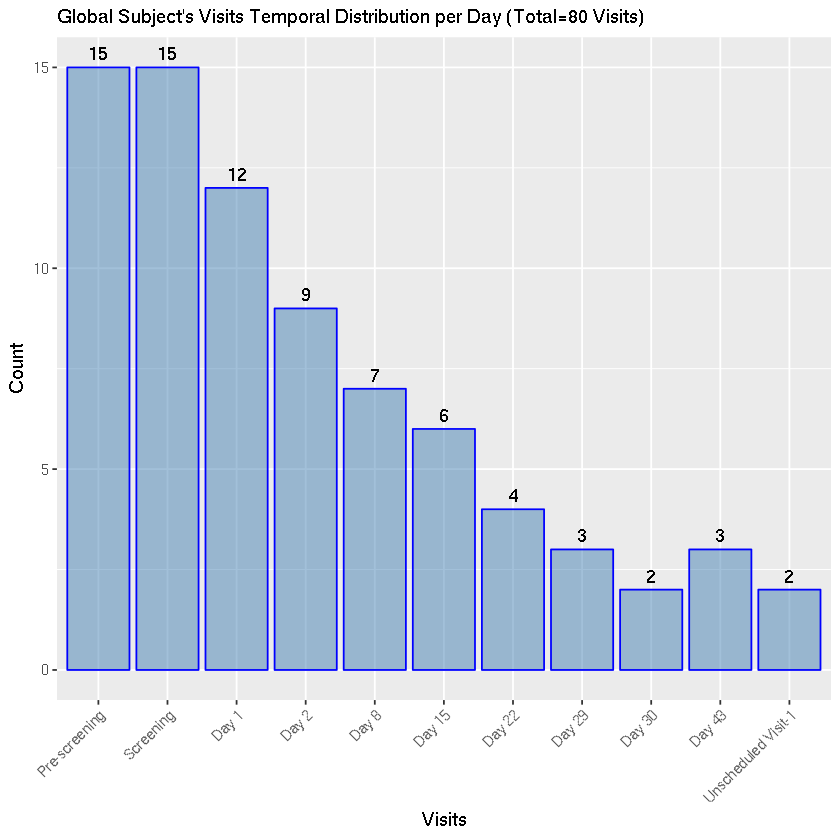

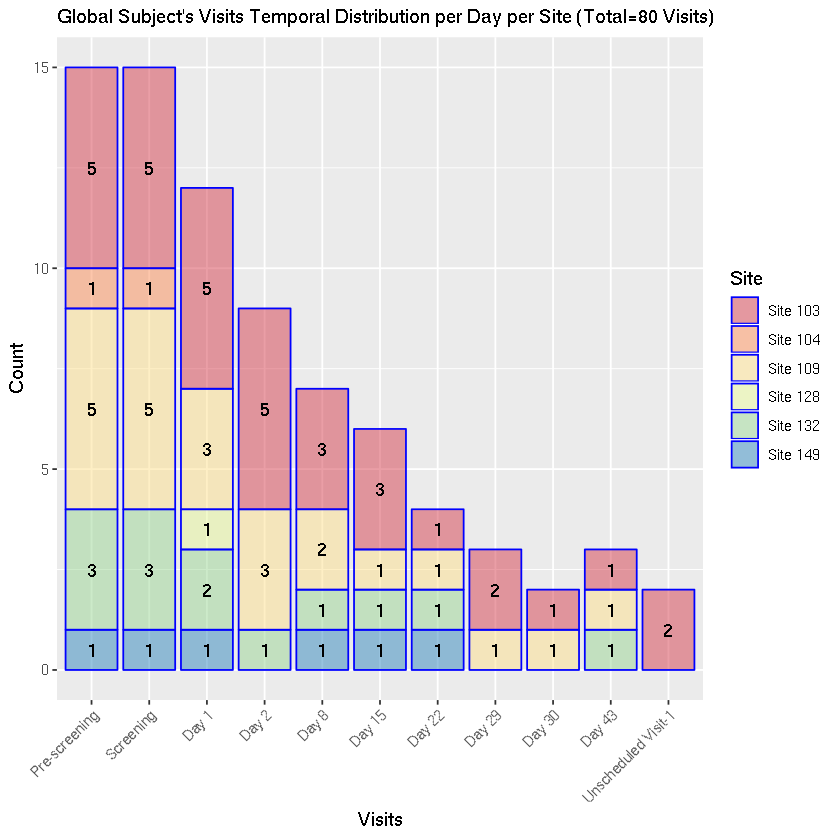

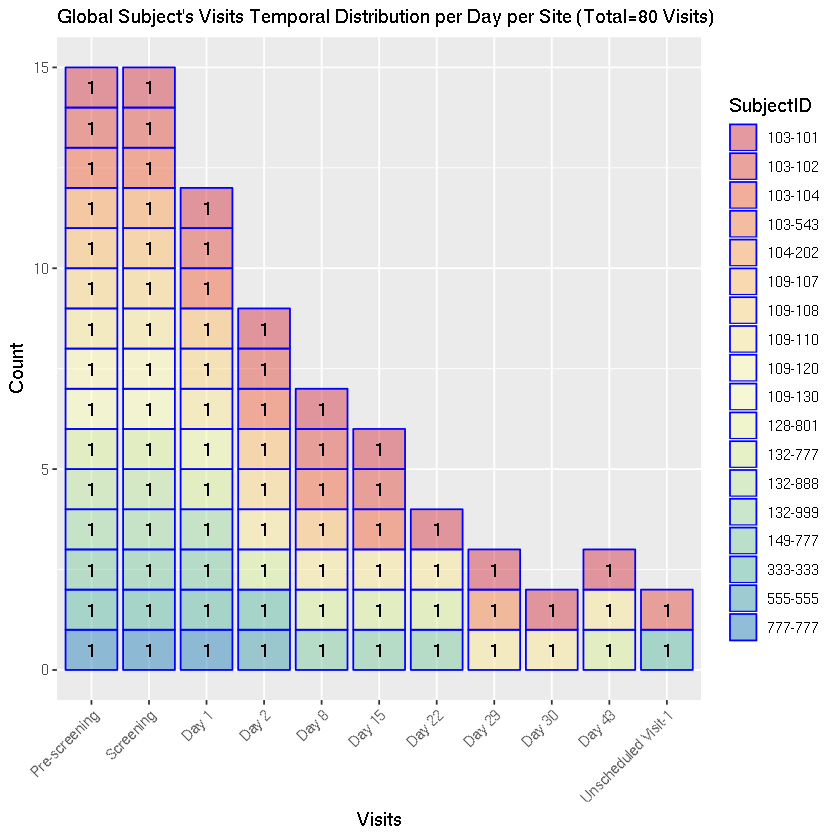

In [7]:
# Global Visualization
# Total Visits per Site

p <- ggplot(df_DOV.filtered, aes(Site)) 
p <- p + labs(title="Subject's Visits Distribution (Visits per each Site with total of 78)") +
  labs(x="Site", y="Count") 
p <- p + geom_bar(color="blue",fill="steelblue", alpha=0.5) 
p <- p + theme(axis.text.x=element_text(angle = 45, hjust = 1))
p <- p + geom_text(stat='count', aes(label=..count..), vjust=-0.25)
print(p)

# Total Visits per day 
q <- ggplot(df_DOV.filtered, aes(Visit)) 
q <- q + labs(title="Global Subject's Visits Temporal Distribution per Day (Total=80 Visits)") +
  labs(x="Visits", y="Count") 
q <- q + geom_bar(color="blue",fill="steelblue", alpha=0.5) 
q <- q + theme(axis.text.x=element_text(angle = 45, hjust = 1))
q <- q + geom_text(stat='count', aes(label=..count..), vjust=-0.5)
print(q)

# Total vists of Subjets per site 
q1 <- ggplot(df_DOV.filtered, aes(Visit, fill=Site)) 
q1 <- q1 + labs(title="Global Subject's Visits Temporal Distribution per Day per Site (Total=80 Visits)") +
  labs(x="Visits", y="Count") 
q1 <- q1 + geom_bar(color="blue", alpha=0.5) + scale_fill_brewer(palette="Spectral")
q1 <- q1 + theme(axis.text.x=element_text(angle = 45, hjust = 1))
q1 <- q1 + geom_text(stat='count', aes(label=..count..), position = position_stack(vjust = .5))  
print(q1)


# Total visits per Subject per Day
colourCount = length(unique(df_DOV.filtered$SubjectID))
getPalette = colorRampPalette(brewer.pal(9, "Spectral"))

q2 <- ggplot(df_DOV.filtered, aes(Visit, fill=SubjectID)) 
q2 <- q2 + labs(title="Global Subject's Visits Temporal Distribution per Day per Site (Total=80 Visits)") +
  labs(x="Visits", y="Count") 
q2 <- q2 + geom_bar(color="blue", alpha=0.5) + scale_fill_manual(values = getPalette(colourCount)) 
#scale_fill_brewer(palette=c("Set1", "Set2"))
q2 <- q2 + theme(axis.text.x=element_text(angle = 45, hjust = 1))
q2 <- q2 + geom_text(stat='count', aes(label=..count..), position = position_stack(vjust = .5))  
print(q2)


In [9]:
# Subjects Diary Records Dataframes

headers_SUBJ_DIARY <- read.csv(file="SUBJ_DIARY.txt", sep="\t", header = F, nrows = 1, as.is = T)
df_SUBJ_DIARY <- read.csv(file="SUBJ_DIARY.txt", sep="\t", skip = 1, header = F)
colnames(df_SUBJ_DIARY)<- headers_SUBJ_DIARY
# Responents in Spanish Forms
headers_SUBJ_DIARY_SP <- read.csv(file="SUBJ_DIARY_SP.txt", sep="", header = F, nrows = 1, as.is = T)
df_SUBJ_DIARY_SP <- read.csv(file="SUBJ_DIARY_SP.txt", sep="\t", skip = 1, header = F)
colnames(df_SUBJ_DIARY_SP)<- headers_SUBJ_DIARY

df_SUBJ_DIARY$NEPRODAT <- as.Date(paste0(df_SUBJ_DIARY$EPRODAT),format="%d-%b-%y")
df_SUBJ_DIARY_SP$NEPRODAT <- as.Date(paste0(df_SUBJ_DIARY_SP$EPRODAT),format="%d-%b-%y")
# Dataframe characteristics
#str(df_SUBJ_DIARY)
#str(df_SUBJ_DIARY_SP)

# Concatenate the 2 dataframes into a single one
df_SUBJ_DIARY_FULL <- rbind(df_SUBJ_DIARY,df_SUBJ_DIARY_SP)

df_SUBJ_DIARY_FULL$Site <- factor(df_SUBJ_DIARY_FULL$Site, 
                                     levels=c("Site 103", "Site 109", "Site 132", "Site 149"))

#str(df_SUBJ_DIARY_FULL)
#summary(df_SUBJ_DIARY_FULL)

# Subjects Diary data characteristics

row.has.na <- apply(df_SUBJ_DIARY_FULL, 1, function(x){any(is.na(x))})
# Number of row missing data
paste0('Initial number of rows with NA: ', sum(row.has.na))
df_SUBJ_DIARY_FULL.filtered <- df_SUBJ_DIARY_FULL[!row.has.na,]

#head(df_SUBJ_DIARY_FULL)
#str(df_SUBJ_DIARY_FULL)
#summary(df_SUBJ_DIARY_FULL)

#head(df_SUBJ_DIARY_FULL.filtered)
#str(df_SUBJ_DIARY_FULL.filtered)
#summary(df_SUBJ_DIARY_FULL.filtered)


[1] "Initial number of rows with NA: 14"

## SUBJ_DIARY.txt and SUBJ_DIARY_SP.txt file description


### Data summary

In this data, there were a total of 14 entries with DATA missing. 
The data considers only 4 sites. 

### Visualization of data distribuition


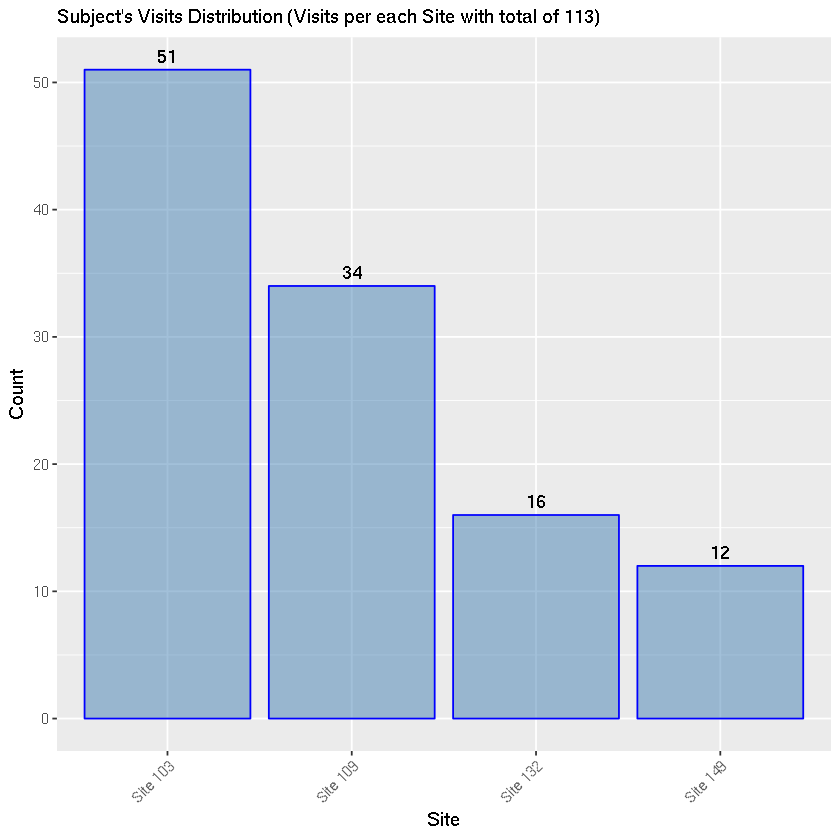

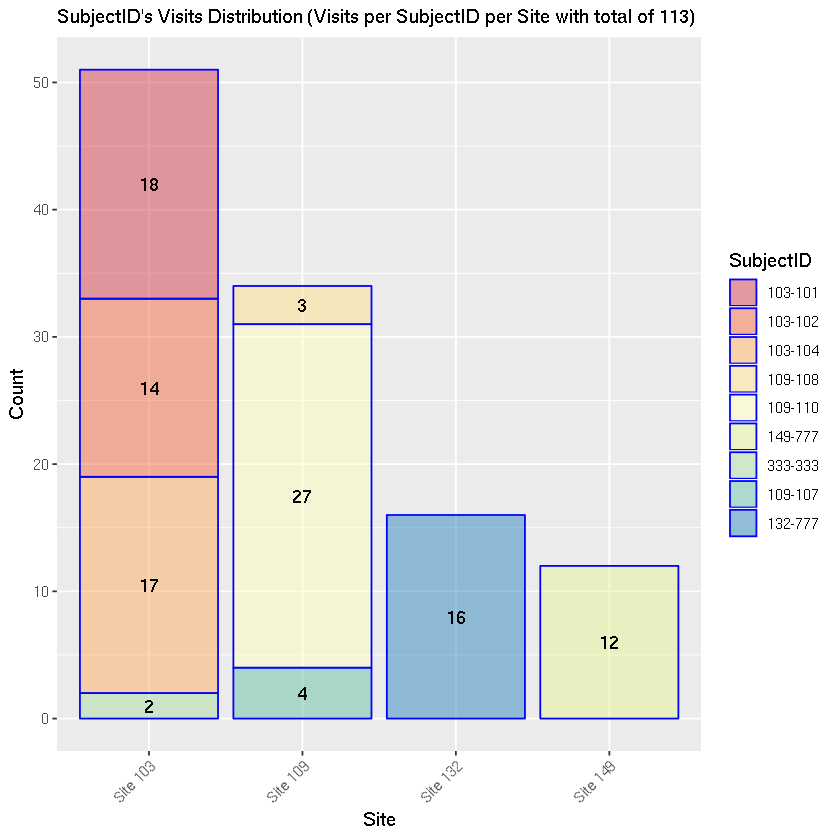

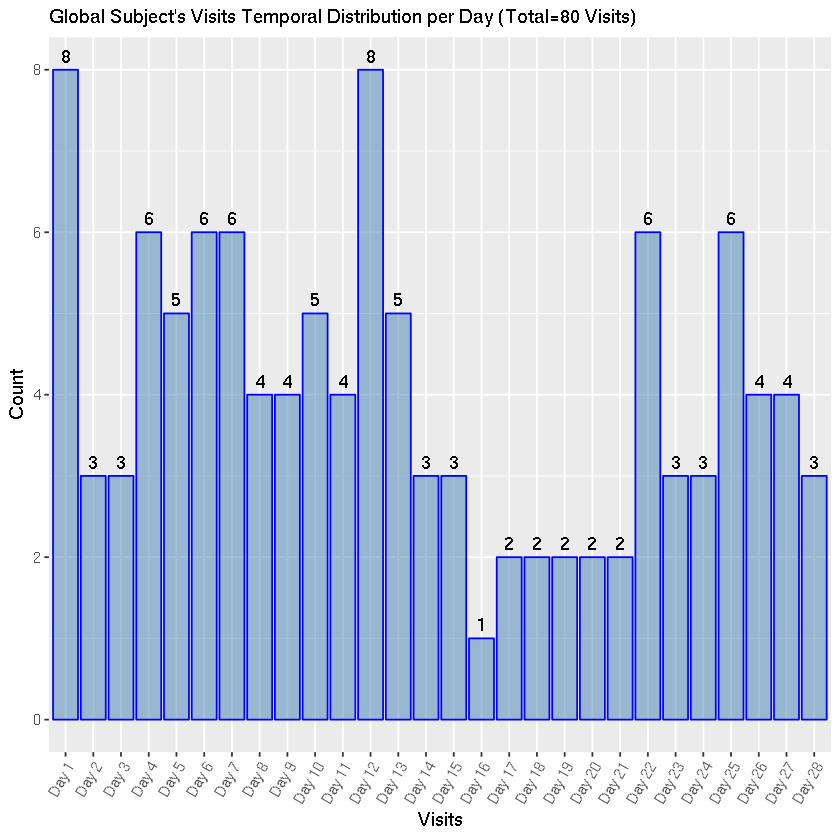

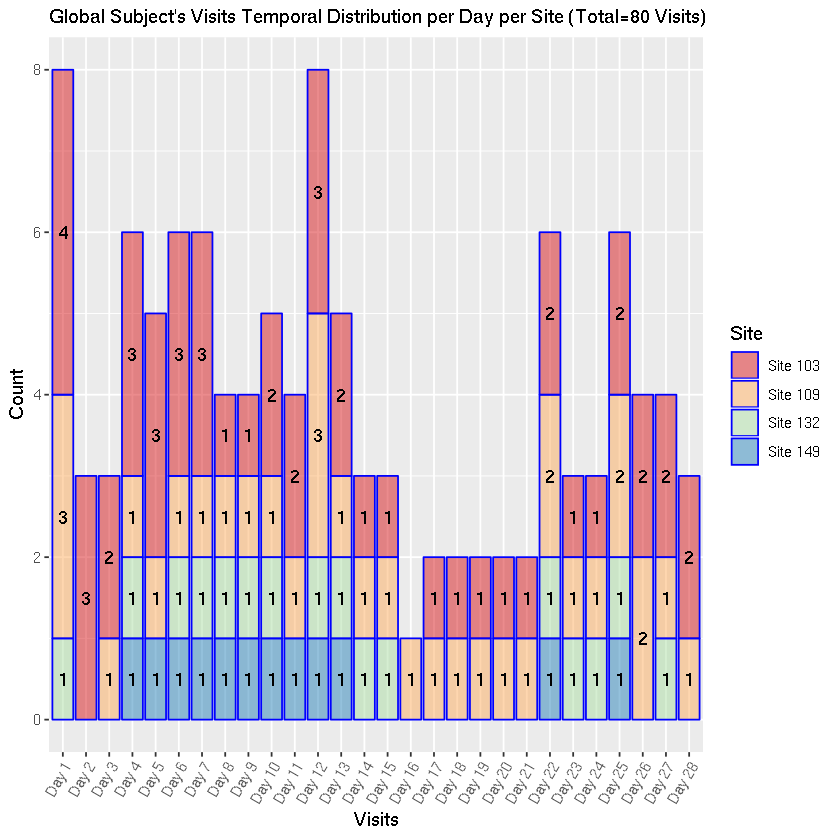

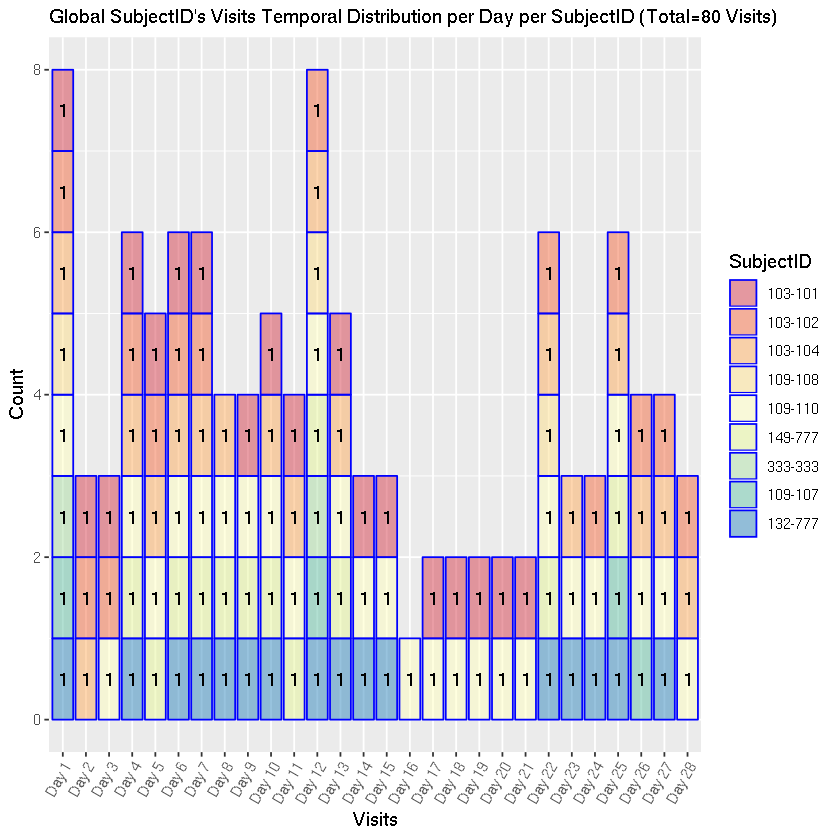

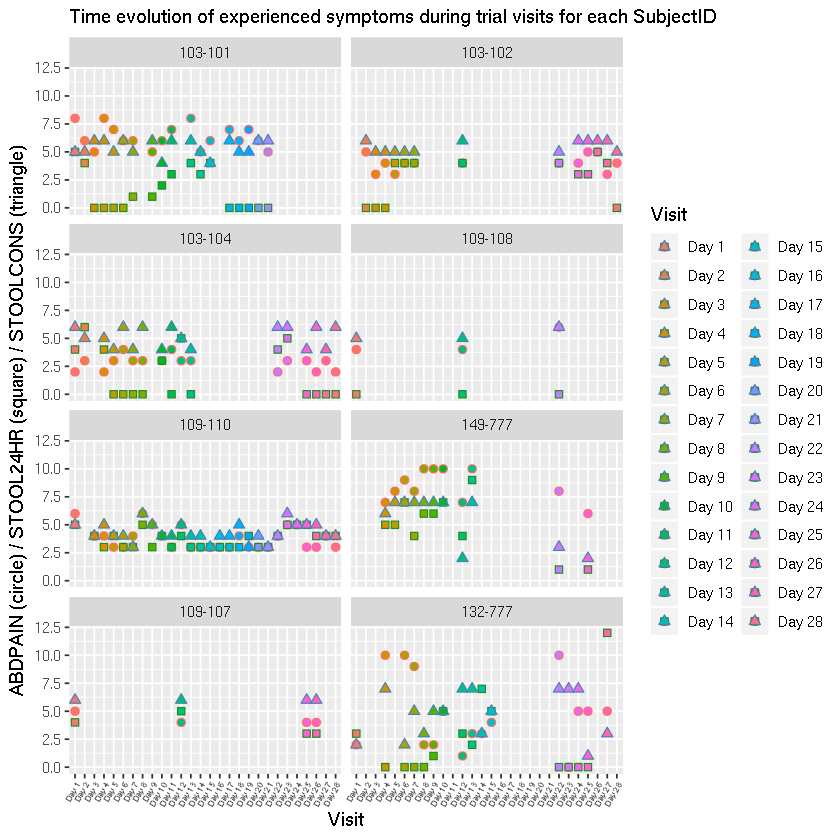

In [10]:
p <- ggplot(df_SUBJ_DIARY_FULL.filtered, aes(Site)) 
p <- p + labs(title="Subject's Visits Distribution (Visits per each Site with total of 113)") +
  labs(x="Site", y="Count") 
p <- p + geom_bar(color="blue",fill="steelblue", alpha=0.5) 
p <- p + theme(axis.text.x=element_text(angle = 45, hjust = 1))
p <- p + geom_text(stat='count', aes(label=..count..), vjust=-0.5)
print(p)

p1 <- ggplot(df_SUBJ_DIARY_FULL.filtered, aes(Site, fill=SubjectID)) 
p1 <- p1 + labs(title="SubjectID's Visits Distribution (Visits per SubjectID per Site with total of 113)") +
  labs(x="Site", y="Count") 
p1 <- p1 + geom_bar(color="blue", alpha=0.5) + scale_fill_brewer(palette="Spectral")
p1 <- p1 + theme(axis.text.x=element_text(angle = 45, hjust = 1))
p1 <- p1 + geom_text(stat='count', aes(label = ..count..), position = position_stack(vjust = .5))
print(p1)


# Order Visit factor properly for plotting
#fn2 = factor(df_SUBJ_DIARY_FULL.filtered$Visit, 
#            levels=unique(df_SUBJ_DIARY_FULL.filtered$Visit[order(df_SUBJ_DIARY_FULL.filtered$Visit)]), 
#           ordered=TRUE)
#my.factor = function(x) { factor(x, levels = unique(x)) }
#df_SUBJ_DIARY_FULL.filtered$Visit<- my.factor(fn2)

levels(df_SUBJ_DIARY_FULL.filtered$Visit) <- c(paste0("Day ",1:28), ordered = TRUE)

q <- ggplot(df_SUBJ_DIARY_FULL.filtered, aes(Visit)) 
q <- q + labs(title="Global Subject's Visits Temporal Distribution per Day (Total=80 Visits)") +
  labs(x="Visits", y="Count") 
q <- q + geom_bar(color="blue",fill="steelblue", alpha=0.5) 
q <- q + theme(axis.text.x=element_text(angle = 60, hjust = 1))
q <- q + geom_text(stat='count', aes(label=..count..), vjust=-0.5)
print(q)

q1 <- ggplot(df_SUBJ_DIARY_FULL.filtered, aes(Visit, fill=Site)) 
q1 <- q1 + labs(title="Global Subject's Visits Temporal Distribution per Day per Site (Total=80 Visits)") +
  labs(x="Visits", y="Count") 
q1 <- q1 + geom_bar(color="blue", alpha=0.5) + scale_fill_brewer(palette="Spectral")
q1 <- q1 + theme(axis.text.x=element_text(angle = 60, hjust = 1))
q1 <- q1 + geom_text(stat='count', aes(label=..count..), position = position_stack(vjust = .5))
print(q1)

colourCount = length(unique(df_SUBJ_DIARY_FULL.filtered$SubjectID))
getPalette = colorRampPalette(brewer.pal(9, "Spectral"))

q2 <- ggplot(df_SUBJ_DIARY_FULL.filtered, aes(Visit, fill=SubjectID)) 
q2 <- q2 + labs(title="Global SubjectID's Visits Temporal Distribution per Day per SubjectID (Total=80 Visits)") +
  labs(x="Visits", y="Count") 
q2 <- q2 + geom_bar(color="blue", alpha=0.5) + scale_fill_manual(values = getPalette(colourCount)) 
q2 <- q2 + theme(axis.text.x=element_text(angle = 60, hjust = 1))
q2 <- q2 + geom_text(stat='count', aes(label=..count..), position = position_stack(vjust = .5))  
print(q2)

# Eliminate non-real outliers (in the order of thousands) in STOOL24HR 
df_SUBJ_DIARY_FULL.filtered <- subset(df_SUBJ_DIARY_FULL.filtered, STOOL24HR < 20)

# Plot subjects's symptoms thru the clinical trials

pw <- ggplot(data = df_SUBJ_DIARY_FULL.filtered, aes(x = Visit, fill=Visit)) + 
    geom_point(aes(y=ABDPAIN), colour="indianred1", size = 2, shape=21) +
    geom_point(aes(y=STOOL24HR), colour="forestgreen", size = 2, shape=22) +
    geom_point(aes(y=STOOLCONS), colour="steelblue", size = 2, shape=24) 

    
pw <- pw + facet_wrap(~SubjectID, ncol=2) + theme(axis.text.x=element_text(size=4, angle = 60, hjust = 1)) +
    ggtitle("Time evolution of experienced symptoms during trial visits for each SubjectID") +
    ylab("ABDPAIN (circle) / STOOL24HR (square) / STOOLCONS (triangle)")

print(pw)


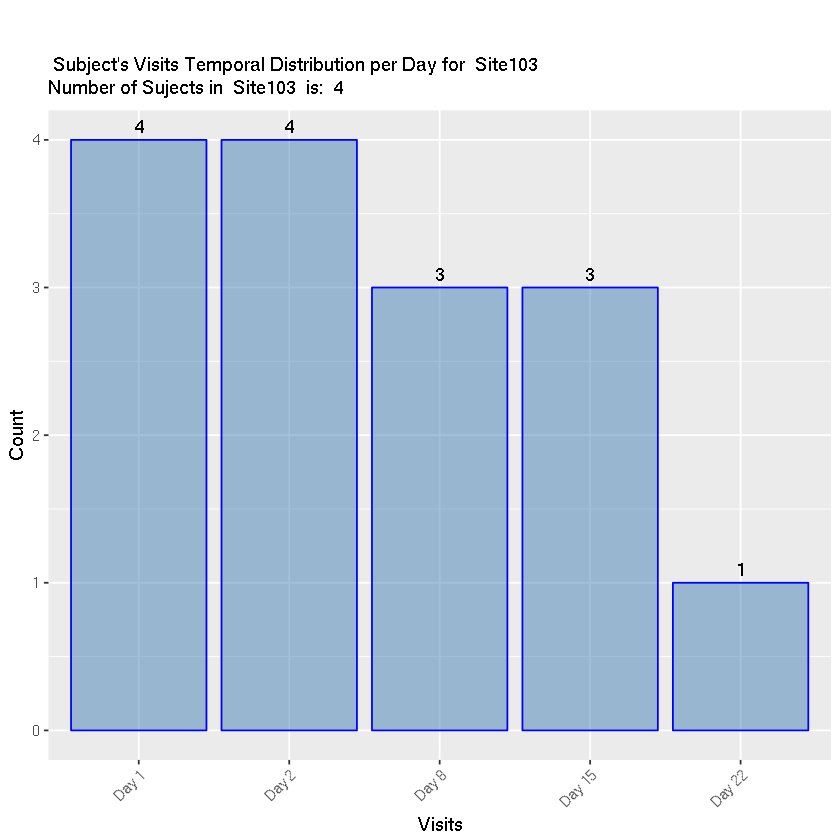

Warning message:
“Removed 2 rows containing missing values (geom_point).”

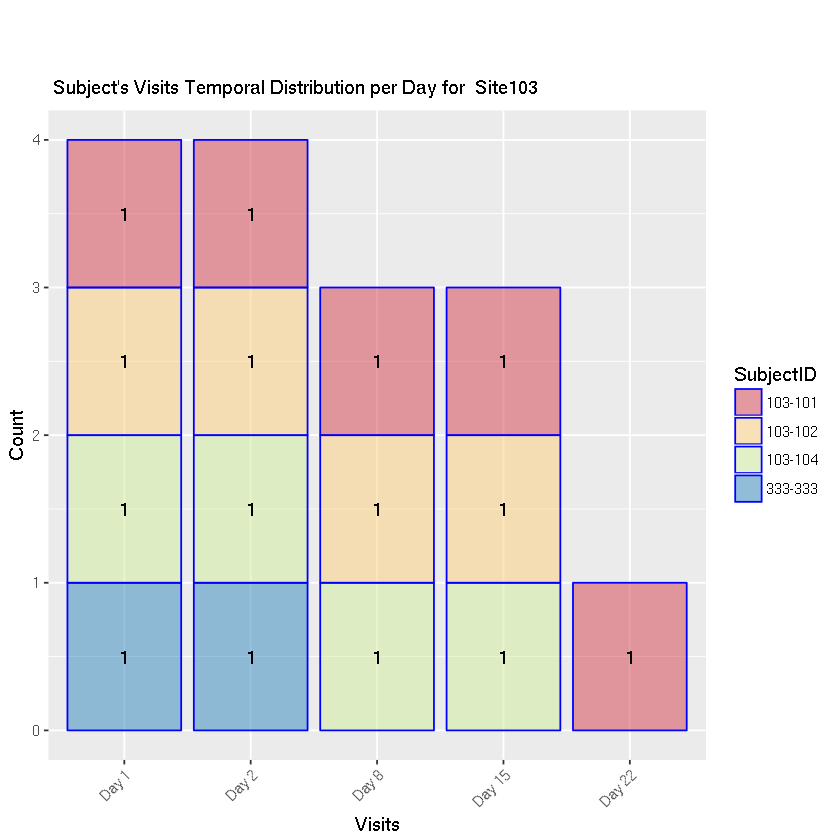

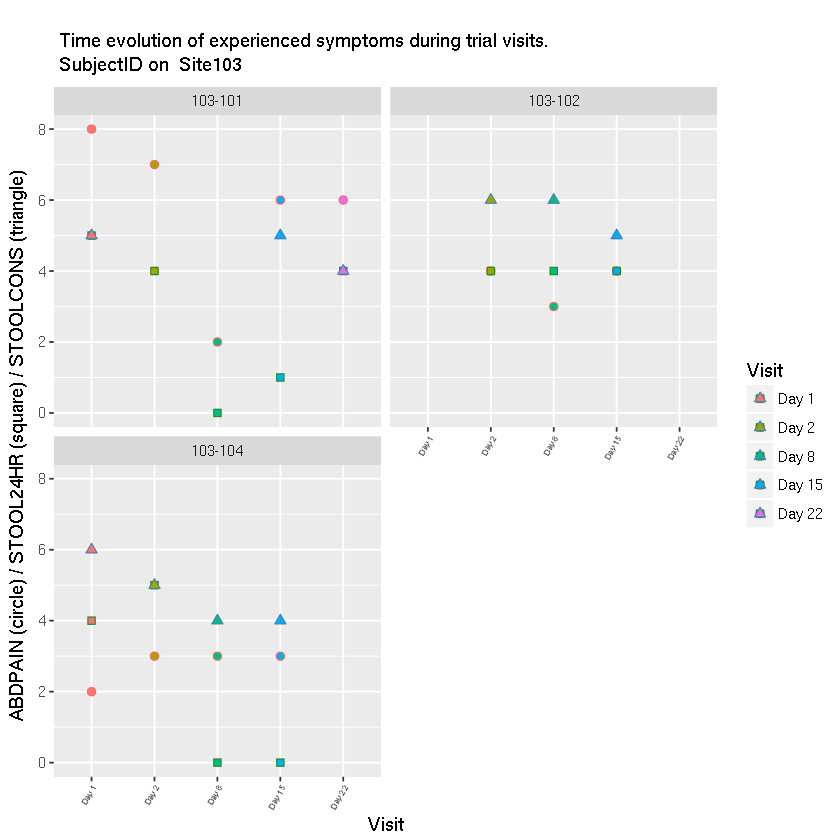

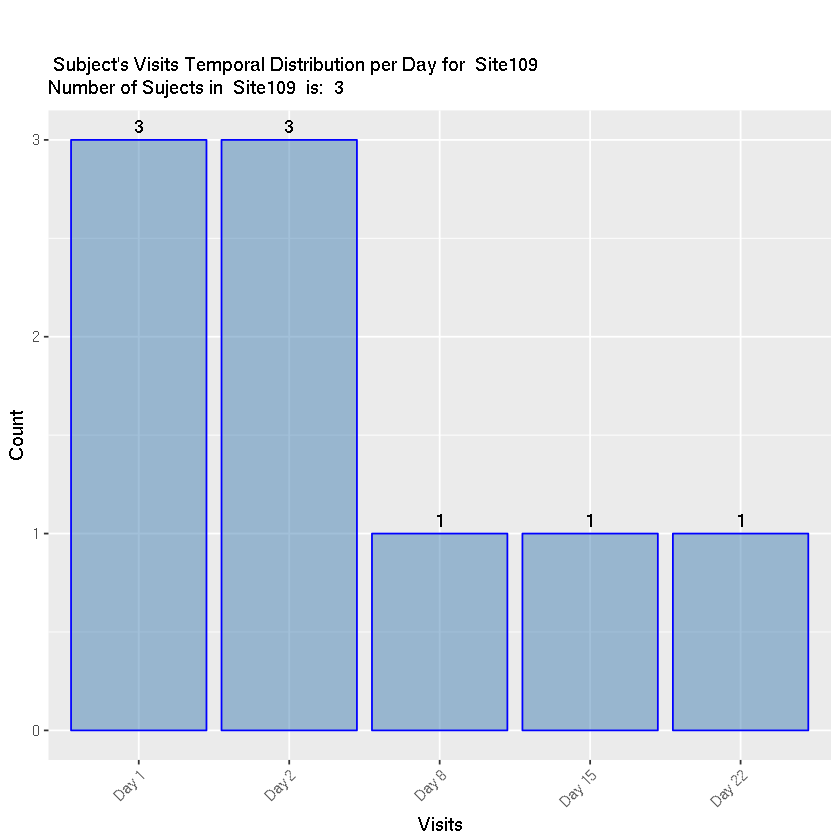

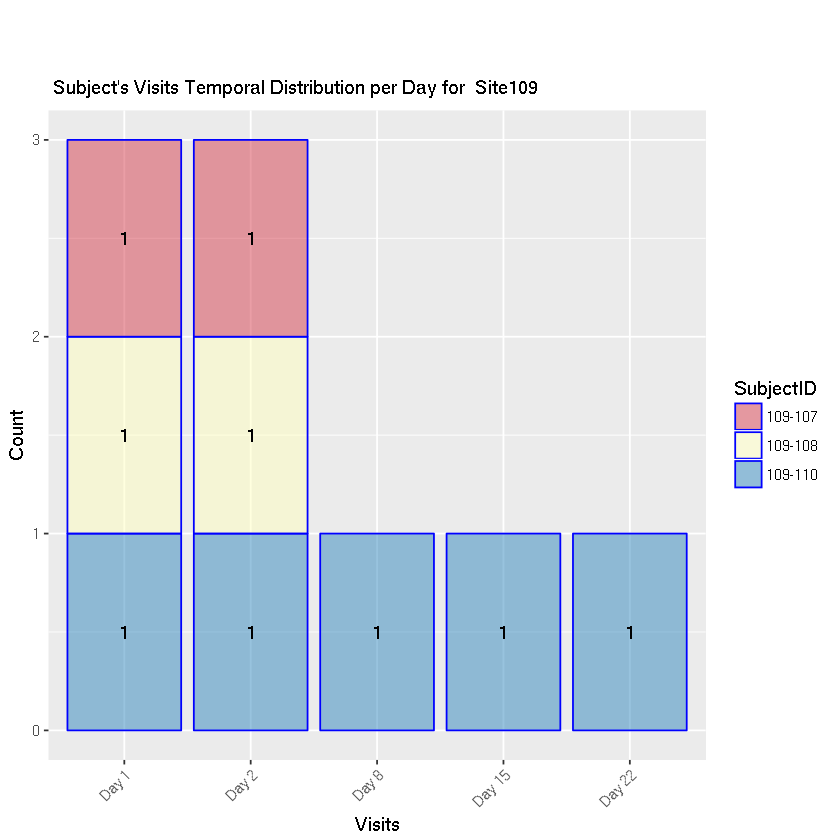

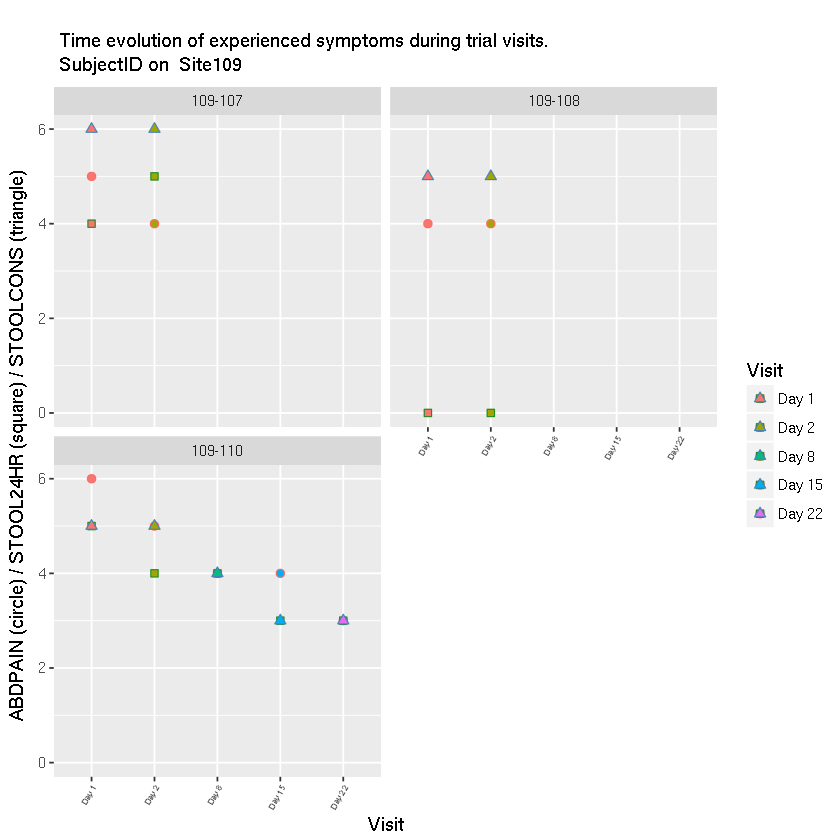

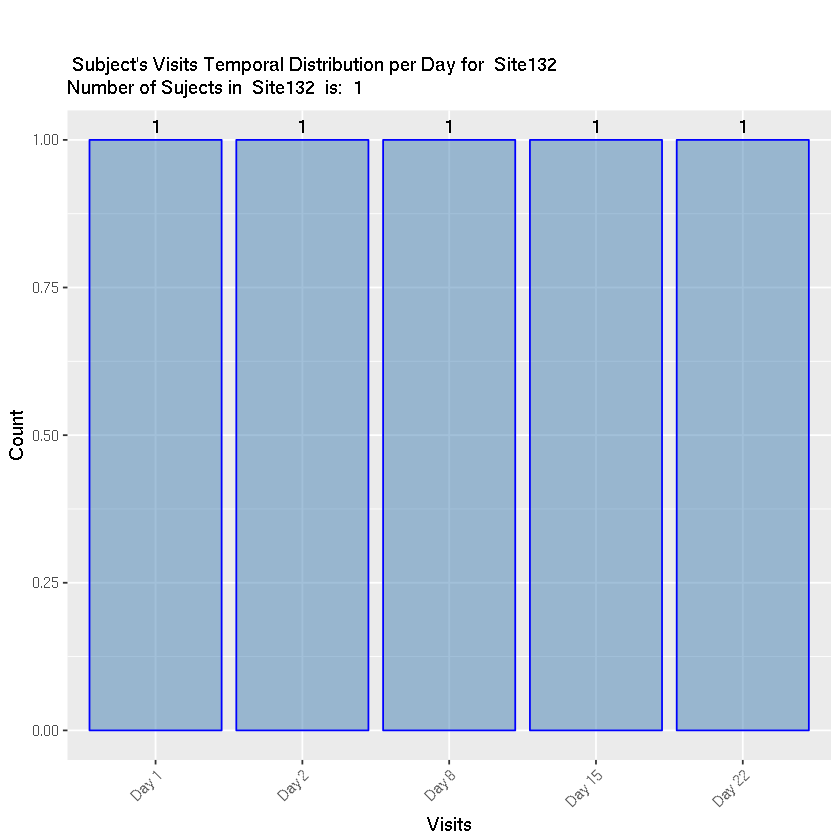

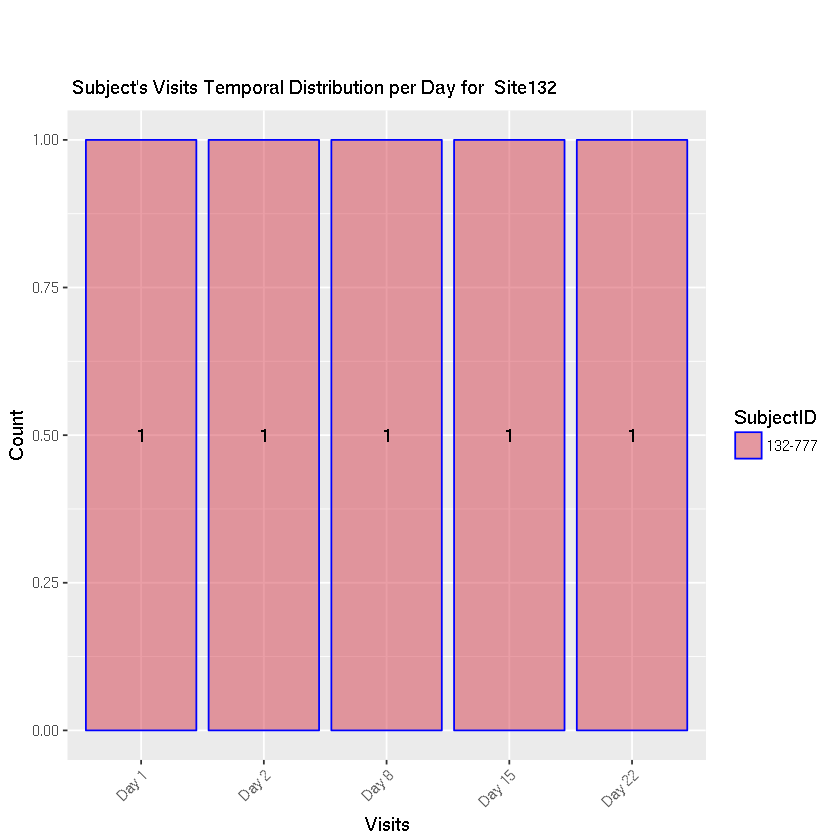

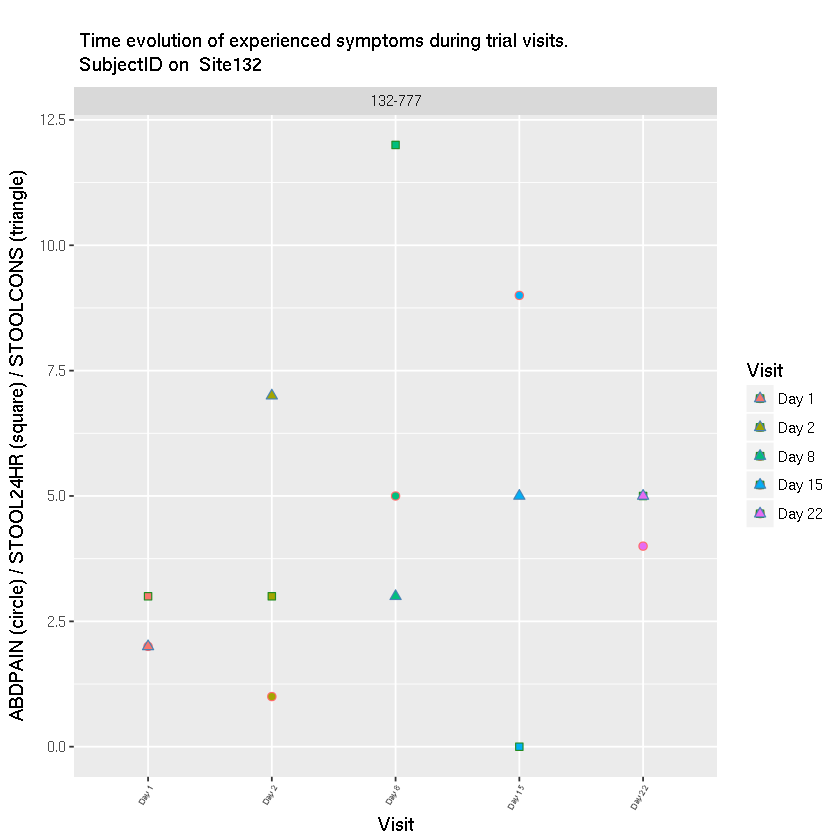

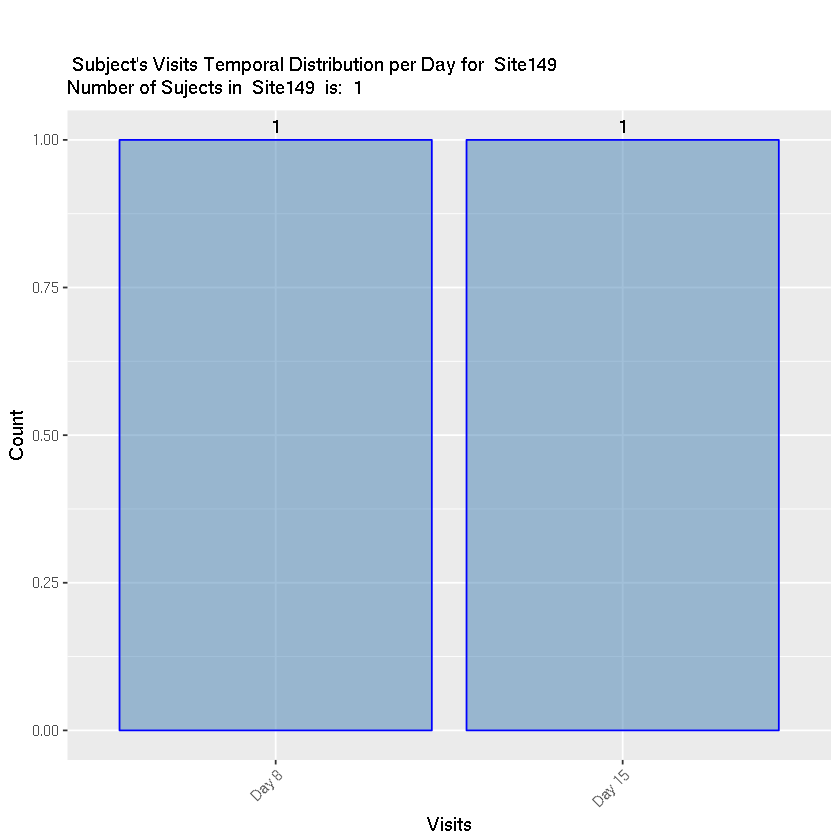

Warning message:
“Removed 1 rows containing missing values (geom_point).”

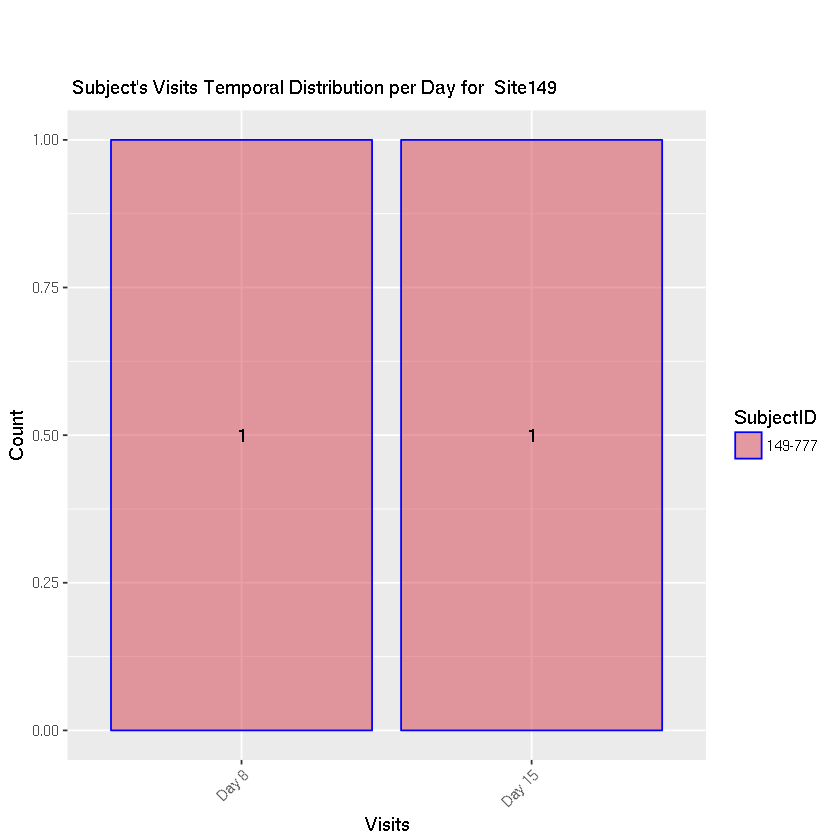

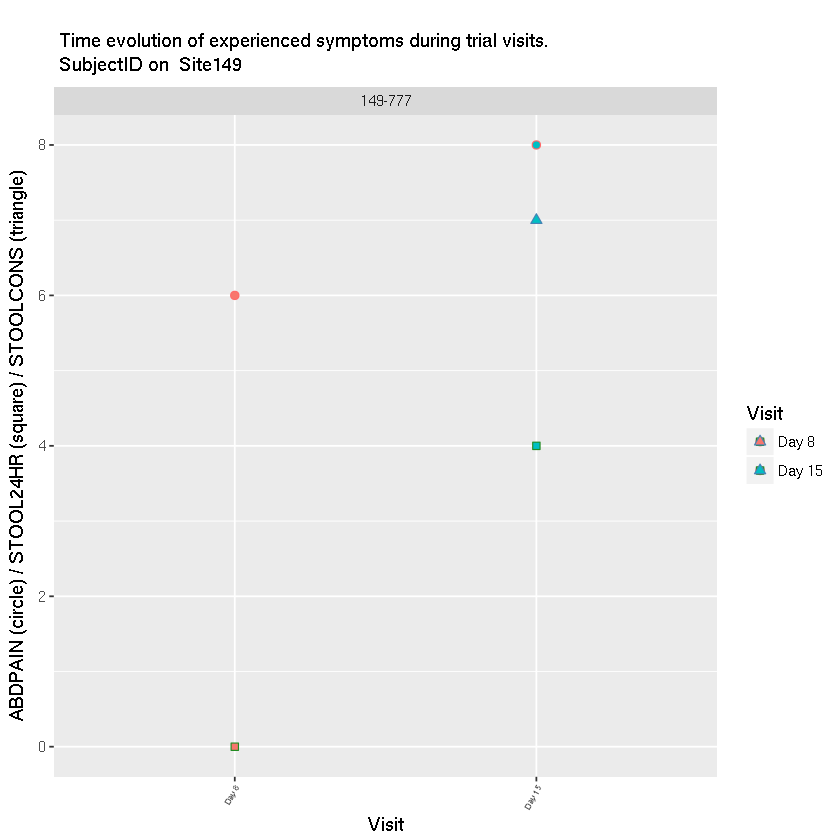

In [21]:
# Merge the 2 dataframes df_DOV and df_SUBJ_DIARY
# And produce specific plots for each Site (Site as a variable)

df_DIARY_DATA <- merge(df_DOV,df_SUBJ_DIARY_FULL,by=c("SubjectID","Site", "Visit")) 
# Eliminate space in Site number
df_DIARY_DATA$Site <- gsub(" ", "", (unlist(df_DIARY_DATA$Site, use.names = FALSE)))

# Create specific dataframes for analyzing each Site
# Computes the number of SubjectsIDs
for (i in unique(unlist(df_DIARY_DATA$Site, use.names = FALSE))){
    tmp <- paste0("df_DIARY_DATA_", i) 
    tmp <- subset(df_DIARY_DATA, Site == i)
    Site_Subjects <- paste("Number of Sujects in ", i, " is: ", 
                           length(unique(unlist(tmp$SubjectID, use.names = FALSE))))
    
    Site_Case <- paste("\n", "\n","Subject's Visits Temporal Distribution per Day for ", i)
    
    q <- ggplot(tmp, aes(Visit)) 
    q <- q + ggtitle(paste0(Site_Case, "\n", Site_Subjects)) + labs(x="Visits", y="Count") 
    q <- q + geom_bar(color="blue",fill="steelblue", alpha=0.5) 
    q <- q + theme(axis.text.x=element_text(angle = 45, hjust = 1))
    q <- q + geom_text(stat='count', aes(label=..count..), vjust=-0.5)
    print(q)
    
    
   # Here 
    colourCount = length(unique(tmp$SubjectID))
    getPalette = colorRampPalette(brewer.pal(9, "Spectral"))

    q1 <- ggplot(tmp, aes(Visit, fill=SubjectID)) 
    q1 <- q1 + ggtitle(paste0( "\n", Site_Case)) + labs(x="Visits", y="Count") 
    q1 <- q1 + geom_bar(color="blue", alpha=0.5) + scale_fill_manual(values = getPalette(colourCount)) 
    q1 <- q1 + theme(axis.text.x=element_text(angle = 45, hjust = 1))
    q1 <- q1 + geom_text(stat='count', aes(label=..count..), position = position_stack(vjust = .5))  
    print(q1)

    # Here 
    # Eliminate non-real outliers (in the order of thousands) in STOOL24HR 
    tmp <- subset(tmp, STOOL24HR < 20)

    # Plot subjects's symptoms thru the clinical trials
    # Here 
    Case_title <- paste("\n", "Time evolution of experienced symptoms during trial visits.",
                       "\n", "SubjectID on ", i)
    Case_ylabel <- paste("ABDPAIN (circle) / STOOL24HR (square) / STOOLCONS (triangle)")
    pw <- ggplot(data = tmp, aes(x = Visit, fill=Visit)) + 
          geom_point(aes(y=ABDPAIN), colour="indianred1", size = 2, shape=21) +
          geom_point(aes(y=STOOL24HR), colour="forestgreen", size = 2, shape=22) +
          geom_point(aes(y=STOOLCONS), colour="steelblue", size = 2, shape=24) 

    pw <- pw + facet_wrap(as.formula(paste("~", "tmp$SubjectID")), ncol=2) + 
        theme(axis.text.x=element_text(size=4, angle = 60, hjust = 1)) 
    # pw + facet_wrap(~SubjectID, ncol=2) + theme(axis.text.x=element_text(size=4, angle = 60, hjust = 1)) 
    pw <- pw + ggtitle(paste0(Case_title)) + ylab(paste0(Case_ylabel))

    print(pw)
 
    }

#str(df_DIARY_DATA)
#summary(df_DIARY_DATA)
#head(df_DIARY_DATA)

In [11]:
# Second Part (Exploratory Analysis)
# Subjects Vital Signs on Day of Visit Dataframe
headers_VS <- read.csv(file="VS.txt", sep="\t", header = F, nrows = 1, as.is = T)
df_VS <- read.csv(file="VS.txt", sep="\t", skip = 1, header = F)
colnames(df_VS)<- headers_VS
df_VS$NDate <- as.POSIXct(paste0(df_VS$Date_Perf, df_VS$Time_Perf),format="%m/%d/%Y %H:%M:%S")
df_VS$SITE <- as.factor(df_VS$SITE)
df_VS$SUBJ <- as.factor(df_VS$SUBJ)
df_VS$VISIT_NUM <- as.factor(df_VS$VISIT_NUM)
df_VS$SubjectID <- as.factor(paste0(df_VS$SITE, "-", df_VS$SUBJ))
df_VS$Date_Perf <- as.Date(df_VS$Date_Perf, format="%m/%d/%Y")
# Create single columns in the English and Metric systems for Temperature and Weight
df_VS$TEMP_F <- ifelse(!is.na(df_VS$TEMP) & df_VS$TEMP_Unit == "C", df_VS$TEMP * 1.8 + 32, df_VS$TEMP)
df_VS$WT_LB<- ifelse(!is.na(df_VS$WT) & df_VS$WT_Unit == "kg", df_VS$WT*2.2046, df_VS$WT)
df_VS$TEMP_C <- ifelse(!is.na(df_VS$TEMP) & df_VS$TEMP_Unit == "F", (df_VS$TEMP - 32.0)/1.8, df_VS$TEMP)
df_VS$WT_kg<- ifelse(!is.na(df_VS$WT) & df_VS$WT_Unit == "LB", df_VS$WT*0.45359237, df_VS$WT)

In [15]:
# Subjects's Vital Signs data characteristics
head(df_VS)
str(df_VS)
summary(df_VS)


SITE,SUBJ,VISIT_NUM,Date_Perf,Time_Perf,TEMP,TEMP_Unit,PULSE,PULSE_Unit,RESP,⋯,DIAST,DIAST_Unit,WT,WT_Unit,NDate,SubjectID,TEMP_F,WT_LB,TEMP_C,WT_kg
2135,3700,4,2017-03-03,NA,98.4,F,81,beats/min,16,⋯,84,mmHg,228.9,LB,NA,2135-3700,98.4,228.9,36.88889,103.8273
2135,3700,4,2017-03-03,NA,98.4,F,81,beats/min,16,⋯,84,mmHg,228.9,LB,NA,2135-3700,98.4,228.9,36.88889,103.8273
2135,3700,11,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,2135-3700,NA,NA,NA,NA
2135,3700,11,2017-03-31,10:42:00,99.2,F,78,beats/min,16,⋯,77,mmHg,NA,NA,2017-03-31 10:42:00,2135-3700,99.2,NA,37.33333,NA
2135,3700,11,2017-03-31,11:06:00,NA,NA,77,beats/min,17,⋯,80,mmHg,NA,NA,2017-03-31 11:06:00,2135-3700,NA,NA,NA,NA
2135,3700,11,2017-03-31,11:20:00,99.1,F,78,beats/min,17,⋯,77,mmHg,NA,NA,2017-03-31 11:20:00,2135-3700,99.1,NA,37.27778,NA


'data.frame':	7608 obs. of  23 variables:
 $ SITE       : Factor w/ 15 levels "1432","1459",..: 13 13 13 13 13 13 13 13 13 13 ...
 $ SUBJ       : Factor w/ 249 levels "2945","3014",..: 59 59 59 59 59 59 59 59 59 59 ...
 $ VISIT_NUM  : Factor w/ 12 levels "1","2","3","4",..: 4 4 6 6 6 6 6 6 6 6 ...
 $ Date_Perf  : Date, format: "2017-03-03" "2017-03-03" ...
 $ Time_Perf  : Factor w/ 517 levels "10:00:00","10:02:00",..: NA NA NA 37 58 71 NA 37 58 71 ...
 $ TEMP       : num  98.4 98.4 NA 99.2 NA 99.1 NA 99.2 NA 99.1 ...
 $ TEMP_Unit  : Factor w/ 2 levels "C","F": 2 2 NA 2 NA 2 NA 2 NA 2 ...
 $ PULSE      : int  81 81 NA 78 77 78 NA 78 77 78 ...
 $ PULSE_Unit : Factor w/ 1 level "beats/min": 1 1 NA 1 1 1 NA 1 1 1 ...
 $ RESP       : int  16 16 NA 16 17 17 NA 16 17 17 ...
 $ RESP_Unit  : Factor w/ 1 level "breaths/min": 1 1 NA 1 1 1 NA 1 1 1 ...
 $ SYSTOL     : int  130 130 NA 116 120 116 NA 116 120 116 ...
 $ SYSTOL_Unit: Factor w/ 1 level "mmHg": 1 1 NA 1 1 1 NA 1 1 1 ...
 $ DIAST      : 

      SITE           SUBJ        VISIT_NUM      Date_Perf         
 1793   :1334   3876   : 133   11     :2035   Min.   :2016-10-05  
 2261   :1256   3418   :  90   12     :1871   1st Qu.:2017-02-15  
 1432   : 924   4542   :  90   13     :1669   Median :2017-03-13  
 1523   : 764   3698   :  88   2      : 541   Mean   :2017-03-02  
 1742   : 723   3708   :  88   10     : 530   3rd Qu.:2017-03-31  
 1830   : 579   3958   :  88   3      : 425   Max.   :2017-04-28  
 (Other):2028   (Other):7031   (Other): 537   NA's   :1412        
    Time_Perf         TEMP        TEMP_Unit       PULSE            PULSE_Unit  
 10:15:00:  38   Min.   : 34.80   C   : 403   Min.   : 53.00   beats/min:6196  
 14:15:00:  38   1st Qu.: 97.90   F   :4357   1st Qu.: 70.00   NA's     :1412  
 10:35:00:  34   Median : 98.40   NA's:2848   Median : 78.00                   
 11:30:00:  32   Mean   : 93.27               Mean   : 78.69                   
 11:45:00:  32   3rd Qu.: 98.70               3rd Qu.: 84.00    

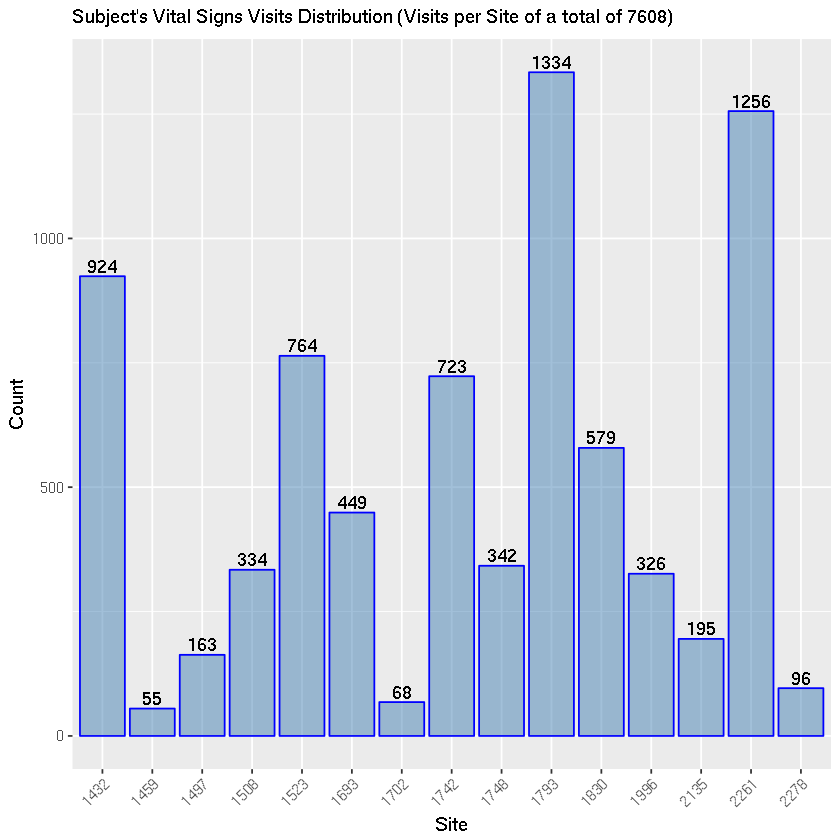

In [109]:
p <- ggplot(df_VS, aes(SITE)) 
p <- p + labs(title="Subject's Vital Signs Visits Distribution (Visits per Site of a total of 7608)") +
  labs(x="Site", y="Count") 
p <- p + geom_bar(color="blue",fill="steelblue", alpha=0.5) 
p <- p + theme(axis.text.x=element_text(angle = 45, hjust = 1))
p <- p + geom_text(stat='count', aes(label=..count..), vjust=-0.25)
p

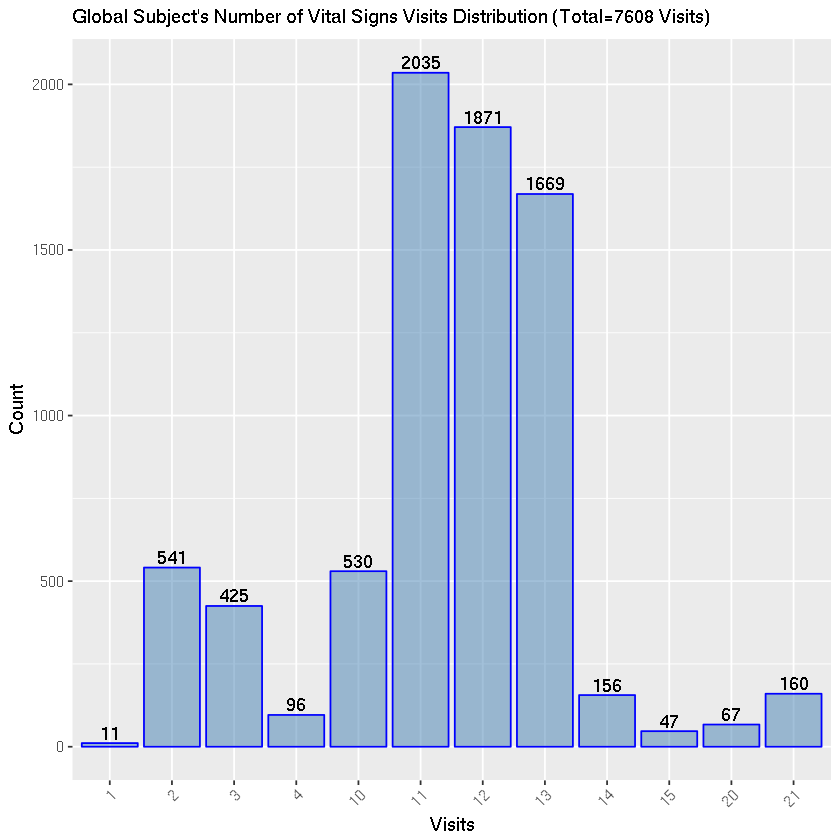

In [110]:
q <- ggplot(df_VS, aes(VISIT_NUM)) 
q <- q + labs(title="Global Subject's Number of Vital Signs Visits Distribution (Total=7608 Visits)") +
  labs(x="Visits", y="Count") 
q <- q + geom_bar(color="blue",fill="steelblue", alpha=0.5) 
q <- q + theme(axis.text.x=element_text(angle = 45, hjust = 1))
q <- q + geom_text(stat='count', aes(label=..count..), vjust=-0.25)
q

Warning message:
“Removed 2848 rows containing non-finite values (stat_boxplot).”

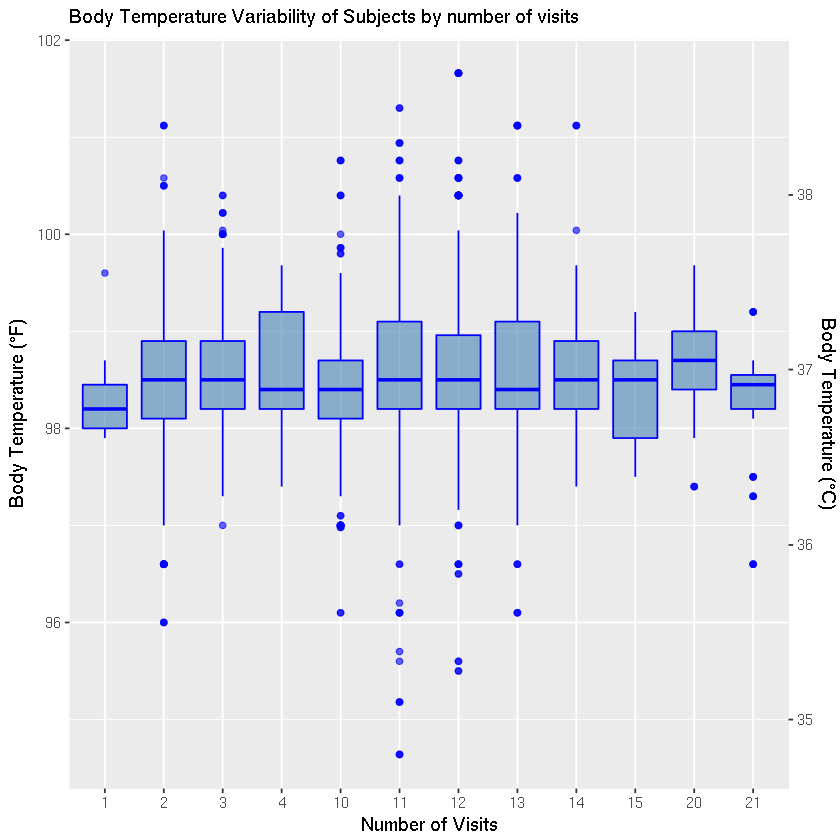

In [133]:
p2 <- ggplot(df_VS, aes(x=VISIT_NUM, y=TEMP_F)) 
p2 <- p2 + geom_boxplot(color="blue", fill="steelblue", alpha=0.6)
p2 <- p2 + labs(x="Number of Visits", y="Body Temperature (°F)") +
      labs(title="Body Temperature Variability of Subjects by number of visits")
p2 <- p2 + scale_y_continuous(sec.axis = sec_axis(~(.-32.0)/1.8, name = "Body Temperature (°C)"))
p2

Warning message:
“Removed 5432 rows containing non-finite values (stat_boxplot).”

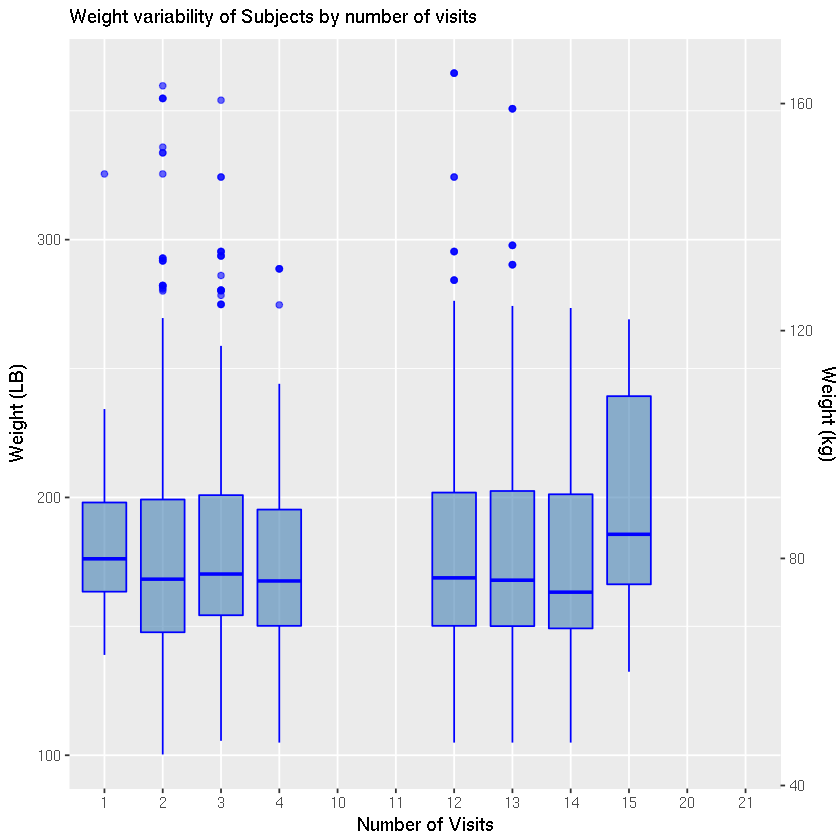

In [134]:
q2 <- ggplot(df_VS, aes(x=VISIT_NUM, y=WT_LB)) 
q2 <- q2 + geom_boxplot(color="blue", fill="steelblue", alpha=0.6)
q2 <- q2 + labs(x="Number of Visits", y="Weight (LB)") +
      labs(title="Weight variability of Subjects by number of visits")

q2 <- q2 + scale_y_continuous(sec.axis = sec_axis(~.*0.45359237, name = "Weight (kg)"))
q2

In [13]:
df_VS_work_3700 <- subset(df_VS, (SITE == "2135" & SUBJ == "3700"),
select=c(SUBJ, VISIT_NUM, TEMP_F, PULSE, RESP, WT_LB, SYSTOL, DIAST)) 
str(df_VS_work_3700)
head(df_VS_work_3700)

'data.frame':	16 obs. of  8 variables:
 $ SUBJ     : Factor w/ 249 levels "2945","3014",..: 59 59 59 59 59 59 59 59 59 59 ...
 $ VISIT_NUM: Factor w/ 12 levels "1","2","3","4",..: 4 4 6 6 6 6 6 6 6 6 ...
 $ TEMP_F   : num  98.4 98.4 NA 99.2 NA 99.1 NA 99.2 NA 99.1 ...
 $ PULSE    : int  81 81 NA 78 77 78 NA 78 77 78 ...
 $ RESP     : int  16 16 NA 16 17 17 NA 16 17 17 ...
 $ WT_LB    : num  229 229 NA NA NA ...
 $ SYSTOL   : int  130 130 NA 116 120 116 NA 116 120 116 ...
 $ DIAST    : int  84 84 NA 77 80 77 NA 77 80 77 ...


SUBJ,VISIT_NUM,TEMP_F,PULSE,RESP,WT_LB,SYSTOL,DIAST
3700,4,98.4,81,16,228.9,130,84
3700,4,98.4,81,16,228.9,130,84
3700,11,NA,NA,NA,NA,NA,NA
3700,11,99.2,78,16,NA,116,77
3700,11,NA,77,17,NA,120,80
3700,11,99.1,78,17,NA,116,77


In [14]:
df_VS_work_3104 <- subset(df_VS, (SITE == "2135" & SUBJ == "3104"),
select=c(SUBJ, VISIT_NUM, TEMP_F, PULSE, RESP, WT_LB, SYSTOL, DIAST)) 
str(df_VS_work_3104)
head(df_VS_work_3104)

'data.frame':	20 obs. of  8 variables:
 $ SUBJ     : Factor w/ 249 levels "2945","3014",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ VISIT_NUM: Factor w/ 12 levels "1","2","3","4",..: 3 3 6 6 6 6 6 6 6 6 ...
 $ TEMP_F   : num  98.5 98.5 NA 98.5 NA 98.5 NA 98.5 NA 98.5 ...
 $ PULSE    : int  100 100 NA 90 92 90 NA 90 92 90 ...
 $ RESP     : int  16 16 NA 16 17 16 NA 16 17 16 ...
 $ WT_LB    : num  176 176 NA NA NA ...
 $ SYSTOL   : int  116 116 NA 133 133 130 NA 133 133 130 ...
 $ DIAST    : int  83 83 NA 89 89 87 NA 89 89 87 ...


,SUBJ,VISIT_NUM,TEMP_F,PULSE,RESP,WT_LB,SYSTOL,DIAST
18,3104,3,98.5,100,16,176.1,116,83
19,3104,3,98.5,100,16,176.1,116,83
20,3104,11,NA,NA,NA,NA,NA,NA
21,3104,11,98.5,90,16,NA,133,89
22,3104,11,NA,92,17,NA,133,89
23,3104,11,98.5,90,16,NA,130,87


In [17]:
df_VS_work <- df_VS[, c(2,3,8,10,12,14,20,21)]
df_VS_work$VISIT_NUM <- as.numeric(df_VS_work$VISIT_NUM)
str(df_VS_work)
head(df_VS_work)

'data.frame':	7608 obs. of  8 variables:
 $ SUBJ     : Factor w/ 249 levels "2945","3014",..: 59 59 59 59 59 59 59 59 59 59 ...
 $ VISIT_NUM: num  4 4 6 6 6 6 6 6 6 6 ...
 $ PULSE    : int  81 81 NA 78 77 78 NA 78 77 78 ...
 $ RESP     : int  16 16 NA 16 17 17 NA 16 17 17 ...
 $ SYSTOL   : int  130 130 NA 116 120 116 NA 116 120 116 ...
 $ DIAST    : int  84 84 NA 77 80 77 NA 77 80 77 ...
 $ TEMP_F   : num  98.4 98.4 NA 99.2 NA 99.1 NA 99.2 NA 99.1 ...
 $ WT_LB    : num  229 229 NA NA NA ...


SUBJ,VISIT_NUM,PULSE,RESP,SYSTOL,DIAST,TEMP_F,WT_LB
3700,4,81,16,130,84,98.4,228.9
3700,4,81,16,130,84,98.4,228.9
3700,6,NA,NA,NA,NA,NA,NA
3700,6,78,16,116,77,99.2,NA
3700,6,77,17,120,80,NA,NA
3700,6,78,17,116,77,99.1,NA


In [16]:
cormat <- round(cor(df_VS_work, use="p"),2)

# Get lower triangle of the correlation matrix
  get_lower_tri<-function(cormat){
    cormat[upper.tri(cormat)] <- NA
    return(cormat)
  }
  # Get upper triangle of the correlation matrix
  get_upper_tri <- function(cormat){
    cormat[lower.tri(cormat)]<- NA
    return(cormat)
  }
upper_tri <- get_upper_tri(cormat)

# Melt the correlation matrix
#library(reshape2)
melted_cormat <- melt(upper_tri, na.rm = TRUE)


ERROR: Error in is.data.frame(x): object 'df_VS_work' not found


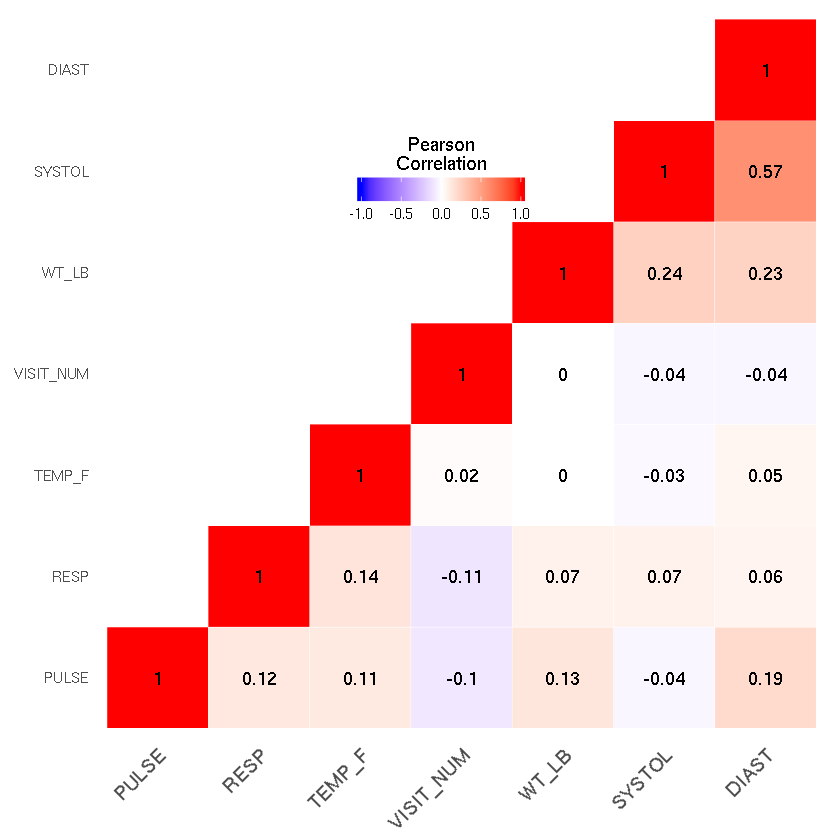

In [173]:
reorder_cormat <- function(cormat){
# Use correlation between variables as distance
dd <- as.dist((1-cormat)/2)
hc <- hclust(dd)
cormat <-cormat[hc$order, hc$order]
}
# Reorder the correlation matrix
cormat <- reorder_cormat(cormat)
upper_tri <- get_upper_tri(cormat)
# Melt the correlation matrix
melted_cormat <- melt(upper_tri, na.rm = TRUE)
# Create a ggheatmap
ggheatmap <- ggplot(melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
    name="Pearson\nCorrelation") +
  theme_minimal()+ # minimal theme
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()
# Print the heatmap
#print(ggheatmap)
# Now add text values 
ggheatmap + 
geom_text(aes(Var2, Var1, label = value), color = "black", size = 4) +
theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.grid.major = element_blank(),
  panel.border = element_blank(),
  panel.background = element_blank(),
  axis.ticks = element_blank(),
  legend.justification = c(1, 0),
  legend.position = c(0.6, 0.7),
  legend.direction = "horizontal")+
  guides(fill = guide_colorbar(barwidth = 7, barheight = 1,
                title.position = "top", title.hjust = 0.5))